In [1]:
%%HTML
<style>

.CodeMirror {
    width: 100vw;
}

.container {
    width: 99% !important;
}

.rendered_html {
  font-size:0.8em;
}
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 100%;
}

</style>

# Introduction to data analytics with pandas

### Quentin Caudron

#### PyData Seattle, July 2017

## Systems check

Do you have a working Python installation, with the `pandas` package ?

In [2]:
import pandas as pd

**Note :** This cell should run without raising a traceback. Assuming it runs, you can also try printing the value of `pd.__version__` to see what version of `pandas` you have installed.

## A little about me

- Lapsed computational physicist
- PhD computational neuroscience, postdoc statistical epidemiology
- Data Scientist at CBRE - *we're hiring*



## A little about the hero of this story

<center><img src="images/coffee_machine.jpg" width="400px" /></center>

We'll be analysing a real-world dataset together. It's about my favourite thing in the world : **coffee**. This dataset was collected at the Mathematics Institute at the University of Warwick. It's a time-series dataset, describing the **total number of coffees made by our espresso machine** by a certain date.

## A little about this workshop

We'll be running through an analysis of this dataset as a way to expose you to the `pandas` API. The aim is to develop a little familiarity with how to work with `pandas`.

Slides are available at https://github.com/QCaudron/pydata_pandas. One notebook contains solutions; **beware of spoilers**.

The notebooks contain **notes** about what we're doing that I'll skip during this workshop, but try to explain on the way.

The `pandas` API is **enormous**. The [documentation](http://pandas.pydata.org/pandas-docs/stable/) is excellent, don't hesitate to look things up.

## Key questions

1. Who are the main contributors to this dataset ?
2. Are there any trends over time ?
3. What are the department's weekly coffee habits ?

## Let's begin

In [3]:
import pandas as pd
%matplotlib inline

**Note :** The second line here tells `matplotlib` to plot directly under the cell where any plotting code is called. `pandas` uses `matplotlib` to generate graphs, and without this, the graphs would appear outside the Jupyter notebook when you called `plt.show()` - but we just want them to appear without having to do this.

http://ipython.readthedocs.io/en/stable/interactive/plotting.html#id1

## Importing the data

Let's import the coffee data from CSV.

In [4]:
data = pd.read_csv("data/coffees.csv")

**Note :** `pandas` can read from many data formats : CSV, JSON, Excel, HDF5, SQL, and more.

http://pandas.pydata.org/pandas-docs/version/0.20/io.html

#### What does this data look like ?

In [5]:
data

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397.0,Quentin
1,2011-10-04 11:48:00,410.0,Quentin
2,2011-10-05 07:02:00,testing,Anthony
3,2011-10-05 08:25:00,NaN,Quentin
4,2011-10-05 10:47:00,464.0,Quentin
5,2011-10-05 13:15:00,481.0,Quentin
6,2011-10-06 07:21:00,503.0,Anthony
7,2011-10-06 10:04:00,513.0,Quentin
8,2011-10-06 12:14:00,539.0,Mike
9,2011-10-06 12:49:00,540.0,Quentin


#### Let's just look at the first few rows.

In [6]:
# .head()
data.head()

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397.0,Quentin
1,2011-10-04 11:48:00,410.0,Quentin
2,2011-10-05 07:02:00,testing,Anthony
3,2011-10-05 08:25:00,NaN,Quentin
4,2011-10-05 10:47:00,464.0,Quentin


We have an index, and three columns : `timestamp`, `coffees`, and `contributor`.

Uh-oh. Why is there a string of text, `testing`, in our coffee numbers ? What's going on in the `coffees` column in the row after that ?

**Note :** `df.head(n=10)` would show the first ten rows. The default is `n=5`.

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html

#### Let's look at that string in the third row.

In [7]:
# .loc or .iloc
data.loc[2]

timestamp      2011-10-05 07:02:00
coffees                    testing
contributor                Anthony
Name: 2, dtype: object

Definitely a string. We'll note this as something to fix after we finish looking around.

**Note :** `.loc` uses a label-based lookup, which means that the value you pass into the square brackets must be in the index. Another method, `.iloc`, is integer-location-based, so `.iloc[2]` would return the third row. In this case, they're the same, but had we changed our index, as we'll see later, things would work differently.

Indexing a dataframe with `[]` directly returns a `pd.Series` or `pd.DataFrame` by searching over *columns*, not rows. Indexing a `pd.Series` with `[]` is like indexing a dataframe with `.iloc`.

https://pandas.pydata.org/pandas-docs/stable/indexing.html

#### We should also take a look at that NaN. In fact, let's look at the first five values in `coffees`.

In [8]:
# [] indexing on a series
data.coffees[:5]

0      397.0
1      410.0
2    testing
3        NaN
4      464.0
Name: coffees, dtype: object

**Note :** here, we're indexing a *series* ( a `pd.Series` object ). From a `pd.DataFrame` ( here, `data` ), when you access a single column ( `data.coffees` or `data["coffees"]` ), the object returned is a `pd.Series`. From that, indexing directly with `[]` works in an integer-location-based manner, and like with numpy arrays, you can take slices ( `[:5]` ).

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html

#### How long is the dataset ?

In [9]:
print("Dataset length :")

# len()
print(len(data))

Dataset length :
671


#### What else can we find out ?

In [10]:
# .describe()
data.describe()

,timestamp,coffees,contributor
count,671,658,671
unique,671,654,9
top,2012-09-13 13:15:00,12358.0,Quentin
freq,1,2,367


Looks like we also have some missing data - we have 671 rows, but the `coffees` column only has 659 entries.

**Note :** `.describe()` returns different things based on what's in the dataframe, as we'll see later. For numerical columns, it will return things like the mean, standard deviation, and percentiles. For object columns ( strings or datetimes ), it will return the most frequent entry and the first and last items. For all columns, `.describe()` will return the count of objects in that column ( not counting NaNs ) and the unique number of entries. You can determine what's returned using `.describe()`'s keyword arguments.

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html

#### A closer look at the null entries

In [11]:
# .isnull() and boolean indexing
data[data.coffees.isnull()]

,timestamp,coffees,contributor
3,2011-10-05 08:25:00,NaN,Quentin
15,2011-10-07 14:10:00,NaN,Ben
72,2011-10-28 10:53:00,NaN,Mike M
95,2011-11-11 11:13:00,NaN,Quentin
323,2012-06-10 16:10:00,NaN,Sergio
370,2012-07-13 13:59:00,NaN,Mike
394,2012-08-03 14:35:00,NaN,Sergio
479,2012-09-21 10:15:00,NaN,Sergio
562,2012-11-01 09:45:00,NaN,Quentin
606,2012-11-30 13:11:00,NaN,Quentin


**Note :** `.isnull()` returns a boolean array ( an array of `True`s and `False`s ), that you can then use to index the dataframe directly. Here, our boolean array tells us which entries in the `coffees` column are null, and we use that to index against the full dataframe - so we get back every column in the dataframe, but only those rows where `coffees` is null.

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isnull.html

#### What type of Python objects are the columns ?

In [12]:
# .dtypes
data.dtypes

timestamp      object
coffees        object
contributor    object
dtype: object

The `contributor` column makes sense as `object`, because we expect strings there; but surely the `timestamp` should be a timestamp-type, and `coffees` should be numerical ?

#### Inspecting what's in the `timestamp` column

In [13]:
# printing an element of a series with [] indexing
print(data.timestamp[0])

# printing its type()
print(type(data.timestamp[0]))

2011-10-03 08:22:00
<class 'str'>


It looks like the `timestamp` field was read from CSV as a string. That makes sense - CSV files are very basic. We'll have `pandas` interpret these strings as datetimes for us automatically.

**Note :** here's an example of using direct `[]` indexing on a `pd.Series`. We're accessing the first entry, just to see what type of object we have there.

#### On our first pass, what problems did we find ?

- The `timestamp` column contains strings; these need to be datetimes
- The `coffees` column contains some null values and at least one string

## Cleaning the data

#### The `coffees` column should only contain numerical data.

In [14]:
# pd.to_numeric, and coercing errors
data.coffees = pd.to_numeric(data.coffees, errors="coerce")

data.head()

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397.0,Quentin
1,2011-10-04 11:48:00,410.0,Quentin
2,2011-10-05 07:02:00,NaN,Anthony
3,2011-10-05 08:25:00,NaN,Quentin
4,2011-10-05 10:47:00,464.0,Quentin


#### The `coffees` column contains NaNs.

In [15]:
# .dropna() using a subset, and passing inplace
data.dropna(subset=["coffees"], inplace=True)

data.head()

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397.0,Quentin
1,2011-10-04 11:48:00,410.0,Quentin
4,2011-10-05 10:47:00,464.0,Quentin
5,2011-10-05 13:15:00,481.0,Quentin
6,2011-10-06 07:21:00,503.0,Anthony


#### The `coffees` column is of type `float`.

In [16]:
# .astype()
data.coffees = data.coffees.astype(int)

data.head()

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397,Quentin
1,2011-10-04 11:48:00,410,Quentin
4,2011-10-05 10:47:00,464,Quentin
5,2011-10-05 13:15:00,481,Quentin
6,2011-10-06 07:21:00,503,Anthony


#### Let's have pandas parse the `timestamp` strings to datetime objects. 

In [17]:
# pd.to_datetime()
data.timestamp = pd.to_datetime(data.timestamp)

# Confirm dtypes
data.dtypes

timestamp      datetime64[ns]
coffees                 int32
contributor            object
dtype: object

#### So where do we stand ?

In [18]:
# .describe(), passing the include kwarg to see all information
data.describe(include="all")

,timestamp,coffees,contributor
count,657,657.000000,657
unique,657,NaN,9
top,2011-10-24 14:32:00,NaN,Quentin
freq,1,NaN,361
first,2011-10-03 08:22:00,NaN,NaN
last,2013-09-13 10:28:00,NaN,NaN
mean,NaN,8568.471842,NaN
std,NaN,4600.215049,NaN
min,NaN,397.000000,NaN
25%,NaN,4986.000000,NaN


## The time-series at a glance

#### Let's begin by visualising the coffee counts.

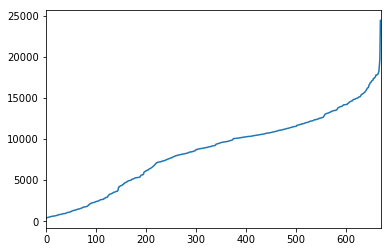

In [19]:
# .plot() on the coffees series
data.coffees.plot()

`pandas` is plotting the coffees against the index, which is just a series of integers.

**Note :** `.plot()` on a `pd.Series` will plot the data against the index. On a `pd.DataFrame`, the `.plot()` method allows plotting of one column against another.

By default, `.plot()` renders a line graph, but you can specify which type of plot you'd like - bar, line, histogram, area, scatter, etc..

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

#### Let's use the dataframe's `plot()` method rather than that of the series.

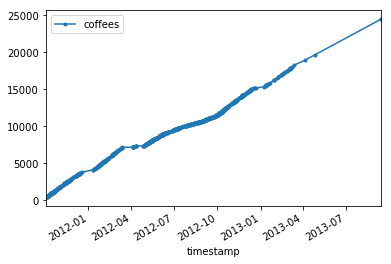

In [20]:
# .plot(), setting x to the timestamp, with ".-" in the style kwarg
data.plot(x=data.timestamp, style=".-")

We have some very uneven spacing in places. We might start by cutting off the last few points of this time-series, which is missing a lot of data.

#### We'll inspect the last few points of this time-series.

In [21]:
# .tail() with ten rows
data.tail(n=10)

,timestamp,coffees,contributor
661,2013-03-04 11:12:00,17793,Quentin
662,2013-03-04 16:43:00,17824,Quentin
663,2013-03-05 10:42:00,17852,Quentin
664,2013-03-05 13:29:00,17868,Quentin
665,2013-03-08 10:28:00,18062,Quentin
666,2013-03-12 08:28:00,18235,Sergio
667,2013-04-05 11:20:00,18942,Sergio
668,2013-04-27 11:04:00,19698,Sergio
669,2013-09-12 15:38:00,24450,Quentin
670,2013-09-13 10:28:00,24463,Quentin


After mid-March, things start getting spaced rather erratically.

#### Let's cut off the tail of the time-series, anything after 2013-03-01

In [22]:
data = data[data.timestamp < "2013-03-01"]

data.tail()

,timestamp,coffees,contributor
655,2013-02-21 13:44:00,17345,Quentin
656,2013-02-21 15:02:00,17354,Quentin
657,2013-02-25 13:33:00,17468,Quentin
658,2013-02-25 17:25:00,17489,Quentin
659,2013-02-27 09:33:00,17564,Quentin


**Note :** this is another example of boolean indexing. `data.timestamp < "2013-03-01"` is a boolean array, and can be passed into the dataframe immediately in `[]`, much like with a `np.ndarray`.

## The main contributors

#### Who are our main contributors ?

In [23]:
# .value_counts()
data.contributor.value_counts()

Quentin    354
Mike       152
Sergio      89
Mike M      29
Colm        12
Anthony      4
Ben          3
Stefano      2
Arturo       1
Name: contributor, dtype: int64

#### Let's plot it.

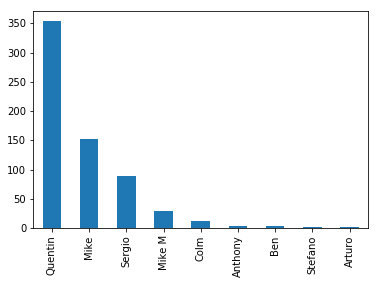

In [24]:
# .plot() a bar chart from the value counts
data.contributor.value_counts().plot(kind="bar")

## The coffee time-series : analysis

#### Let's pull in another dataset, telling us when the machine was broken.

In [190]:
# pd.read_csv(); try using parse_dates as kwarg; also pass index_col
machine_status = pd.read_csv("data/coffee_status.csv", parse_dates=["date"], index_col="date")

machine_status.head()

,status
date,
2011-09-16,OK
2011-09-17,OK
2011-09-18,OK
2011-09-19,OK
2011-09-20,OK


**Note :** the `parse_dates` keyword argument takes several values. By passing in a list of strings, we're telling `pandas` to attempt to parse the dates in columns with those names.

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

#### What values are in the `status` column ?

In [191]:
# .value_counts()
machine_status.status.value_counts()

OK        536
BROKEN     66
Name: status, dtype: int64

#### A quick trick to plot this as a time-series...

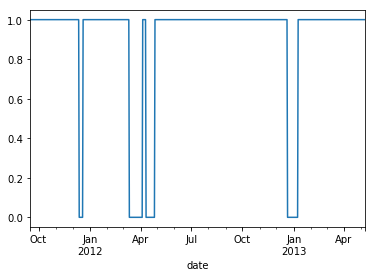

In [192]:
# Make a pd.Series from the status series where things are OK
numerical_status = machine_status.status == "OK"

numerical_status.plot()

**Note :** the first line here creates a boolean `pd.Series`, holding the value `True` when `machine_status.status` is `"OK"`, and `False` otherwise. Because it's a `pd.Series`, its index stays the same as that of `machine_status`, which was a `DatetimeIndex`. Then, we can plot the boolean series ( `True` appearing as `1`, and `False` appearing as `0` ), and just quickly scan to see that there are long areas where the coffee machine was operations, with short bouts ( thankfully ! ) of the machine being broken.

#### Let's join the datasets on the date field !

For that, we need to create a new set of data where the index changes daily.

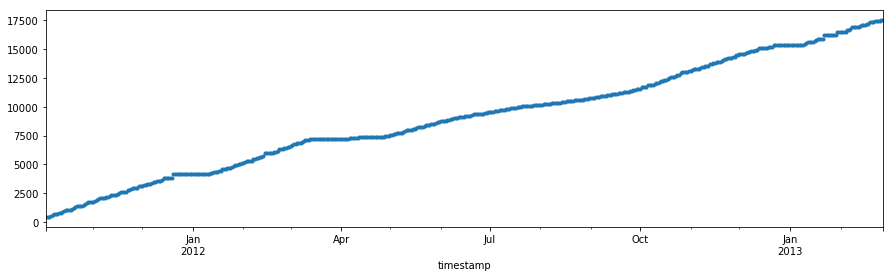

In [193]:
# Create a new series for the number of coffees, indexing on the timestamp
coffees = pd.Series(data.coffees.values, index=data.timestamp)

# Resample the dataframe daily, and fill in any missing values backwards
coffees = coffees.resample("D").bfill()
coffees.plot(style=".", figsize=(15, 4))

**Note :** here, we begin by creating a new `pd.Series`, with the values held in `data.coffees`. We index it by the `data.timestamp` field. 

Then, we resample daily : we create bins, from midnight to midnight, and any points that fall into that bin get averaged. If there are no points that fall in that bin, we get `NaN`. 

Finally, we use `bfill()` to fill any `NaN` points with the next value in the time-series. We can confirm that we've filled in all `NaN`s here using `coffees.isnull().sum()`.

This way, we lose some information. Specifically, we lose the time of day that measurements are taken. To be more accurate, we could have created a daily range of dates :

`wanted = pd.date_range(coffees.index[0], coffees.index[-1], freq="D")`

and then reindexed ( in a way, interpolated ) the coffee values across the union of values in both the current index and the wanted index, then used `interpolate` to fill in missing values, and finally, only selecting those rows where the time index is where we want it.

`coffees = coffees.reindex(wanted | coffees.index).interpolate(method="time").loc[wanted]`


#### Let's join these datasets !

In [205]:
# Use pd.concat to join coffees and machine_status; remember to concat across columns, not rows
joined_df = pd.concat([coffees, machine_status], axis=1)

# Drop NAs; machine_status starts earlier and finishes later
joined_df.dropna(inplace=True)

joined_df.head()

,coffees,status
2011-10-03,397.0,OK
2011-10-04,410.0,OK
2011-10-05,464.0,OK
2011-10-06,503.0,OK
2011-10-07,581.0,OK


#### Let's add a column for the day of the week.

In [206]:
# .dt to access datetime attributes, .weekday from that
# using .assign for safe column creation
joined_df = joined_df.assign(weekday=joined_df.index.dt.weekday)

joined_df.head()

AttributeError: 'DatetimeIndex' object has no attribute 'dt'

#### Sidestep : does adding a column seem a little convoluted ?

Above, we used `.assign()` to assign some data to a new column in the dataframe. That returned a new object, and we assigned that to the same name as we had before : `data`.

There are easier ways to create a new column :

`data["weekday"] = data.timestamp.dt.weekday`

`pandas` will raise a `SettingWithCopyWarning` here. It's telling us that we *may* be doing something to a copy of the dataframe, and not to the original. We use `.assign()` to avoid that. Sometimes, this warning is a false positive - but we cannot guarantee safe behaviour everywhere, so we should take heed.

See some StackOverflow posts about this [here](https://stackoverflow.com/questions/21463589/pandas-chained-assignments/21463854#21463854) and [here](https://stackoverflow.com/questions/42379818/correct-way-to-set-new-column-in-pandas-dataframe-to-avoid-settingwithcopywarnin). To get deep into the `pandas` docs on this, see [this](https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy).

#### So, we now have weekdays... as integers. Let's rename them.

In [25]:
weekdays_text = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekdays_dict = {i: weekdays_text[i] for i in range(7)}

# .apply(), maybe using a lambda
data["weekday"] = data.weekday.apply(lambda x: weekdays_dict[x])

data.head()

,timestamp,coffees,contributor,weekday
0,2011-10-03 08:22:00,397,Quentin,Monday
1,2011-10-04 11:48:00,410,Quentin,Tuesday
4,2011-10-05 10:47:00,464,Quentin,Wednesday
5,2011-10-05 13:15:00,481,Quentin,Wednesday
6,2011-10-06 07:21:00,503,Anthony,Thursday


**Note :** we're creating a list of the days of the week, and then a dictionary mapping 0 to Monday, 1 to Tuesday, and so on. We could have created the dict without that list, but the list will come in handy in the next cell, where we want to order the results of an aggregation.

The `.apply()` method applies a custom function to every row in a dataframe or a series. Here, we're applying a very simple function : one that takes in a key, performs a dict lookup, and returns the value attached to that key in our `weekdays_dict` object.

#### How much coffee was had on any given week day ?

In [26]:
# .groupby() to aggregate by weekday, .count() to count entries on those days
# use .loc to sort by days of the week in order
weekdays_coffee_counts = data.groupby("weekday").count()
weekdays_coffee_counts = weekdays_coffee_counts.loc[weekdays_text]
weekdays_coffee_counts

,timestamp,coffees,contributor
weekday,,,
Monday,145,145,145
Tuesday,97,97,97
Wednesday,131,131,131
Thursday,117,117,117
Friday,114,114,114
Saturday,29,29,29
Sunday,13,13,13


**Note :** we're indexing a series with a list here. That list contains the days of the week in the order we want them. Without that, we'd be seeing this dataframe sorted alphabetically by its index : that is, "Friday", "Monday", "Saturday", ...

#### Maybe a bar chart ?

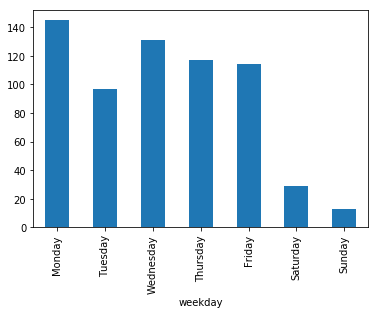

In [27]:
weekdays_coffee_counts.coffees.plot(kind="bar")

#### Back to our unevenly-sampled time-series.

Let's get the number coffees made since the last entry, not to date.

In [28]:
# .diff()
data["coffees_made"] = data.coffees.diff()
data.head()

,timestamp,coffees,contributor,weekday,coffees_made
0,2011-10-03 08:22:00,397,Quentin,Monday,NaN
1,2011-10-04 11:48:00,410,Quentin,Tuesday,13.0
4,2011-10-05 10:47:00,464,Quentin,Wednesday,54.0
5,2011-10-05 13:15:00,481,Quentin,Wednesday,17.0
6,2011-10-06 07:21:00,503,Anthony,Thursday,22.0


**Note :** `.diff()` calculates the difference between sequential elements in a column. The first entry is `NaN` because there's no element above it, so a difference can't be calculated. 

We were able to use the "more direct" column creation here, because this query ( using `.diff()` ) doesn't return a copy of existing data; it creates new data that doesn't exist in the dataframe, and so it's safe to assign that data.

In [39]:
data.dropna()[["coffees", "timestamp", "coffees_made"]].set_index("timestamp").resample("D").sum()

,coffees,coffees_made
timestamp,,
2011-10-04,410.0,13.0
2011-10-05,945.0,71.0
2011-10-06,2658.0,82.0
2011-10-07,3650.0,72.0
2011-10-08,NaN,NaN
2011-10-09,650.0,15.0
2011-10-10,3435.0,63.0
2011-10-11,770.0,57.0
2011-10-12,4868.0,67.0


In [1]:
import pandas as pd

df = pd.DataFrame({
  "the_dates": pd.to_datetime(["2017-01-01", "2017-01-02", "2017-01-03"]),
  "coffees": [1, 5, 12]
})

df.index = df.the_dates

df["weekdays"] = df.the_dates.dt.weekday